# Importing Necessary Libraries

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import sys
sys.path.append('/content/drive/MyDrive/Topic Modelling')

In [6]:
!pip install hdbscan

import pytest
import tempfile
import warnings
import numpy as np
import pandas as pd
from Top2Vec import Top2Vec
import ipywidgets as widgets
from IPython.display import clear_output, display

warnings.filterwarnings('ignore')

     |████████████████████████████████| 6.4MB 12.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp36-cp36m-linux_x86_64.whl size=2311384 sha256=8da839fd1773f1fec9eb7d7e9d8160fd28fff019622c6f276e638a2bb66043ef
  Stored in directory: /root/.cache/pip/wheels/42/63/fb/314ad6c3b270887a3ecb588b8e5aac50b0fad38ff89bb6dff2
Successfully built hdbscan


# Datasets

### Dataset - customer-reviews (Kaggle)

In [ ]:
# get 20 newsgroups data
twcs = pd.read_csv('./drive/MyDrive/Topic Modelling/Data/customer_support_twitter/twcs.csv')

In [ ]:
twcs.head()

In [ ]:
cust_support = twcs.text[0:10000]
docs = list(cust_support)

### Dataset - Sample text 

In [ ]:
docs = ['Ahead of the tenth round of talks scheduled on January 19, both the Centre and farmers remained firm on their position regarding the three new agriculture laws. Union agriculture minister Narendra Singh Tomar on Sunday again urged the protesting farm leaders to give up their stubborn stand on the new farm laws and come for a clause by clause discussion. However, the farmers are stuck on their demand of repealing the new laws and said they are prepared to protest till May 2024. The next Lok Sabha elections in the country will be due around April-May 2024. Addressing reporters in Madhya Pradesh, Tomar today said the farmers should stop being stubborn since the Supreme Court has stayed the implementation of the three laws. The government wants farmer leaders to come for clause by clause discussion at the next meeting on January 19. Except for the demand of repealing the laws, the government is ready to consider seriously and with an open heart other alternatives, he said. Tomar, who left for his constituency by Hazur Sahib Nanded-Amritsar Superfast Express, was seen sharing langar from co-passengers of Sikh community - a gesture which comes amid the ongoing protests by farmers from Punjab against the laws. Tomar said the government offered certain concessions, but the farmer leaders have not shown flexibility and were constantly demanding a repeal of the laws. He reiterated that the government makes laws for the entire country, adding that many farmers, experts and other stakeholders have supported the laws.',
'The farmers protest against the three contentious bills entered day 52 on Sunday. In an affidavit filed before the Supreme Court on Saturday the Bhartiya Kisan Union has urged the Supreme Court to remove the three members of a panel constituted by the top court to resolve the impasse between the protesting farmers and the Union government over the new farm laws.  The union has requested appointment of a former Supreme Court judge along with farm leaders of protesting farmer unions to the panel.  The ninth round of discussions between the government and farm unions on Friday ended in a deadlock with the next round set for January 19. During the meeting, union agriculture minister Narendra Singh Tomar urged the farmers to be flexible and asserted that the government has been accommodative and has already accepted several demands. Like several earlier rounds of discussions, the farm unions demanded that the government commit to complete rollback of the laws.The government on Friday asked protesting farmers to form an informal group to prepare a concrete proposal about their objections and suggestions on the three farm laws for further discussion at their next meeting on January 19 to end the long-running protest at various Delhi borders, but unions stuck to their main demand of a complete repeal of the three Acts.  As nearly five hours of talks between 41 unions and three central ministers did not reach a decisive stage in the ninth round of talks at Vigyan Bhawan, the two sides decided to meet again the next Tuesday. Agriculture Minister Narendra Singh Tomar told farmer leaders at the meeting that the government has been flexible in its approach and urged the same from them.  Ahead of Republic Day, Delhi Police Commissioner S N Shrivastava on Saturday held a review meeting in which he also took stock of the arrangements at farmers agitation sites to maintain law and order.  Thousands of farmers, mainly from Punjab, Haryana and western Uttar Pradesh, are protesting at various border points of Delhi for almost two months now against the three laws.']

### Dataset - News Popularity

In [7]:
news = pd.read_csv('./drive/MyDrive/Topic Modelling/Data/news_popularity_in_social_media/train_file.csv')
news_docs = list(news['Headline'])

# Model - Top2Vec

In [ ]:
pip install numba

In [ ]:
pip install top2vec[sentence_encoders]

#### Restart the kernel

In [ ]:
top2vec = Top2Vec(documents=docs, speed="learn", workers=2, embedding_model='universal-sentence-encoder',
                  min_count = 2)

### Use various functions from Top2Vec

**Search Similar Topics**

Label(value='Enter keywords seperated by space: ')

Text(value='support')

Label(value='Enter negative keywords seperated by space: ')

Text(value='new')

Label(value='Choose number of topics: ')

Text(value='5')

Button(description='show topics', style=ButtonStyle())

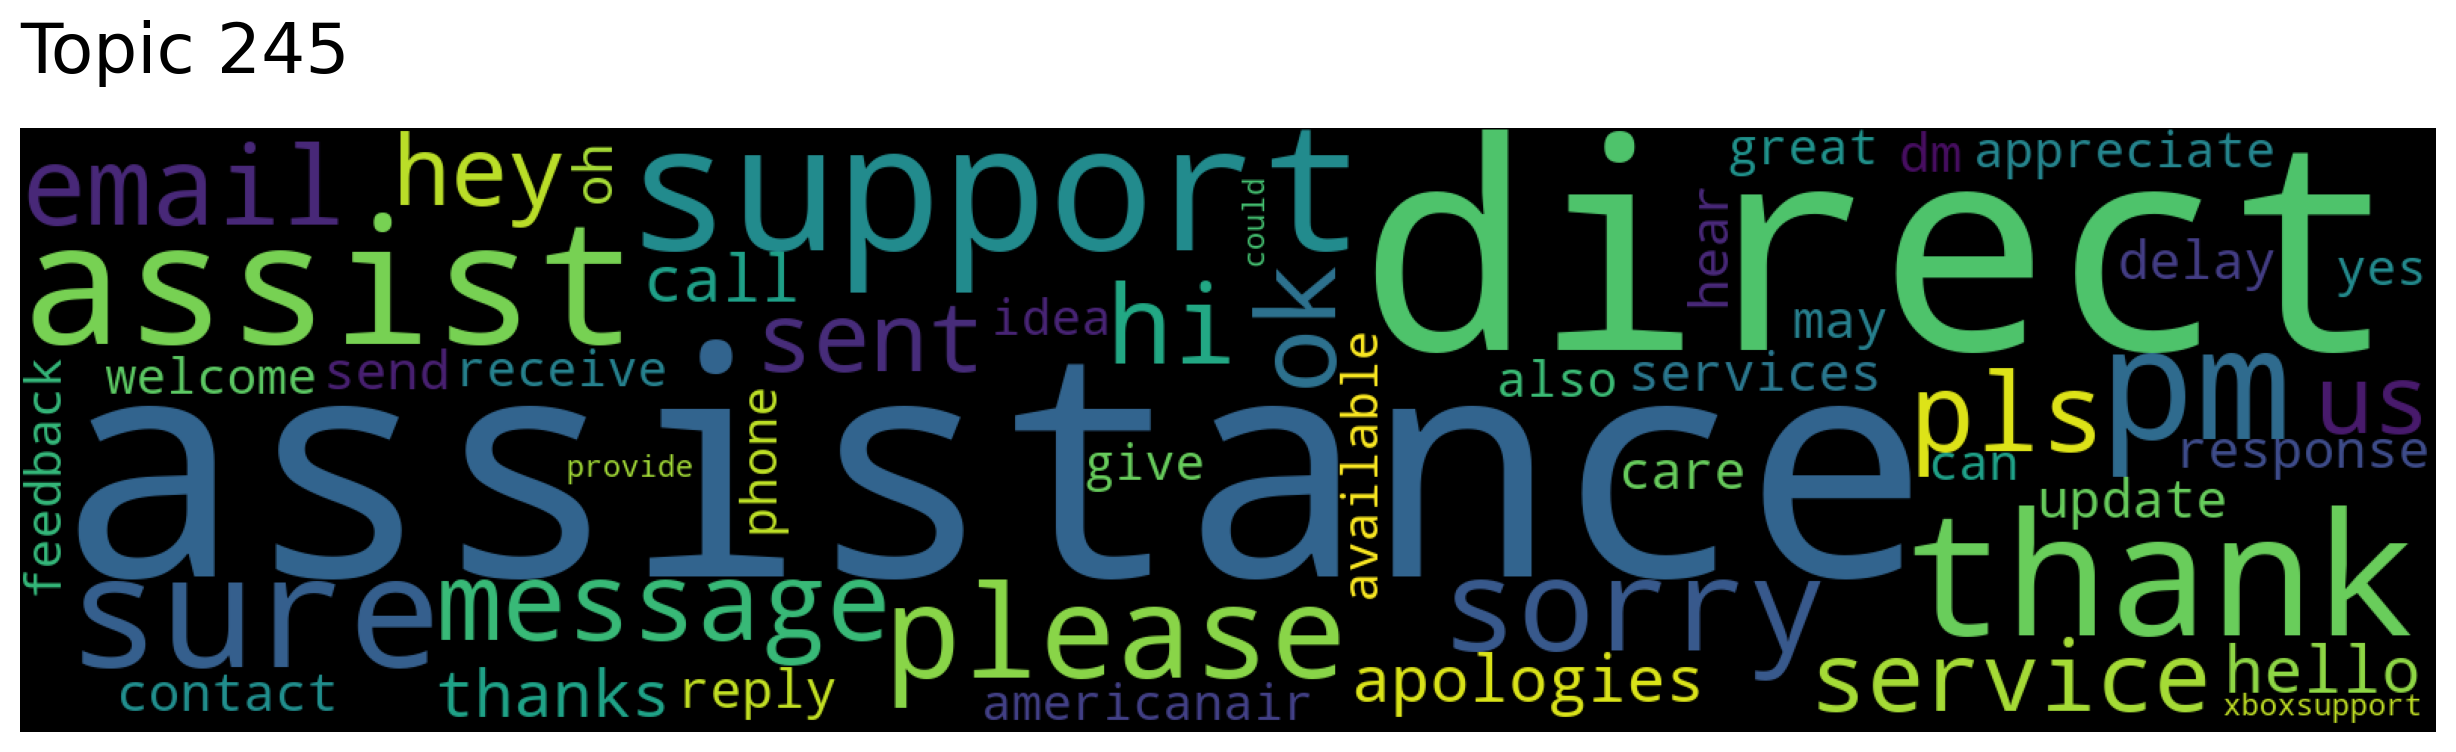

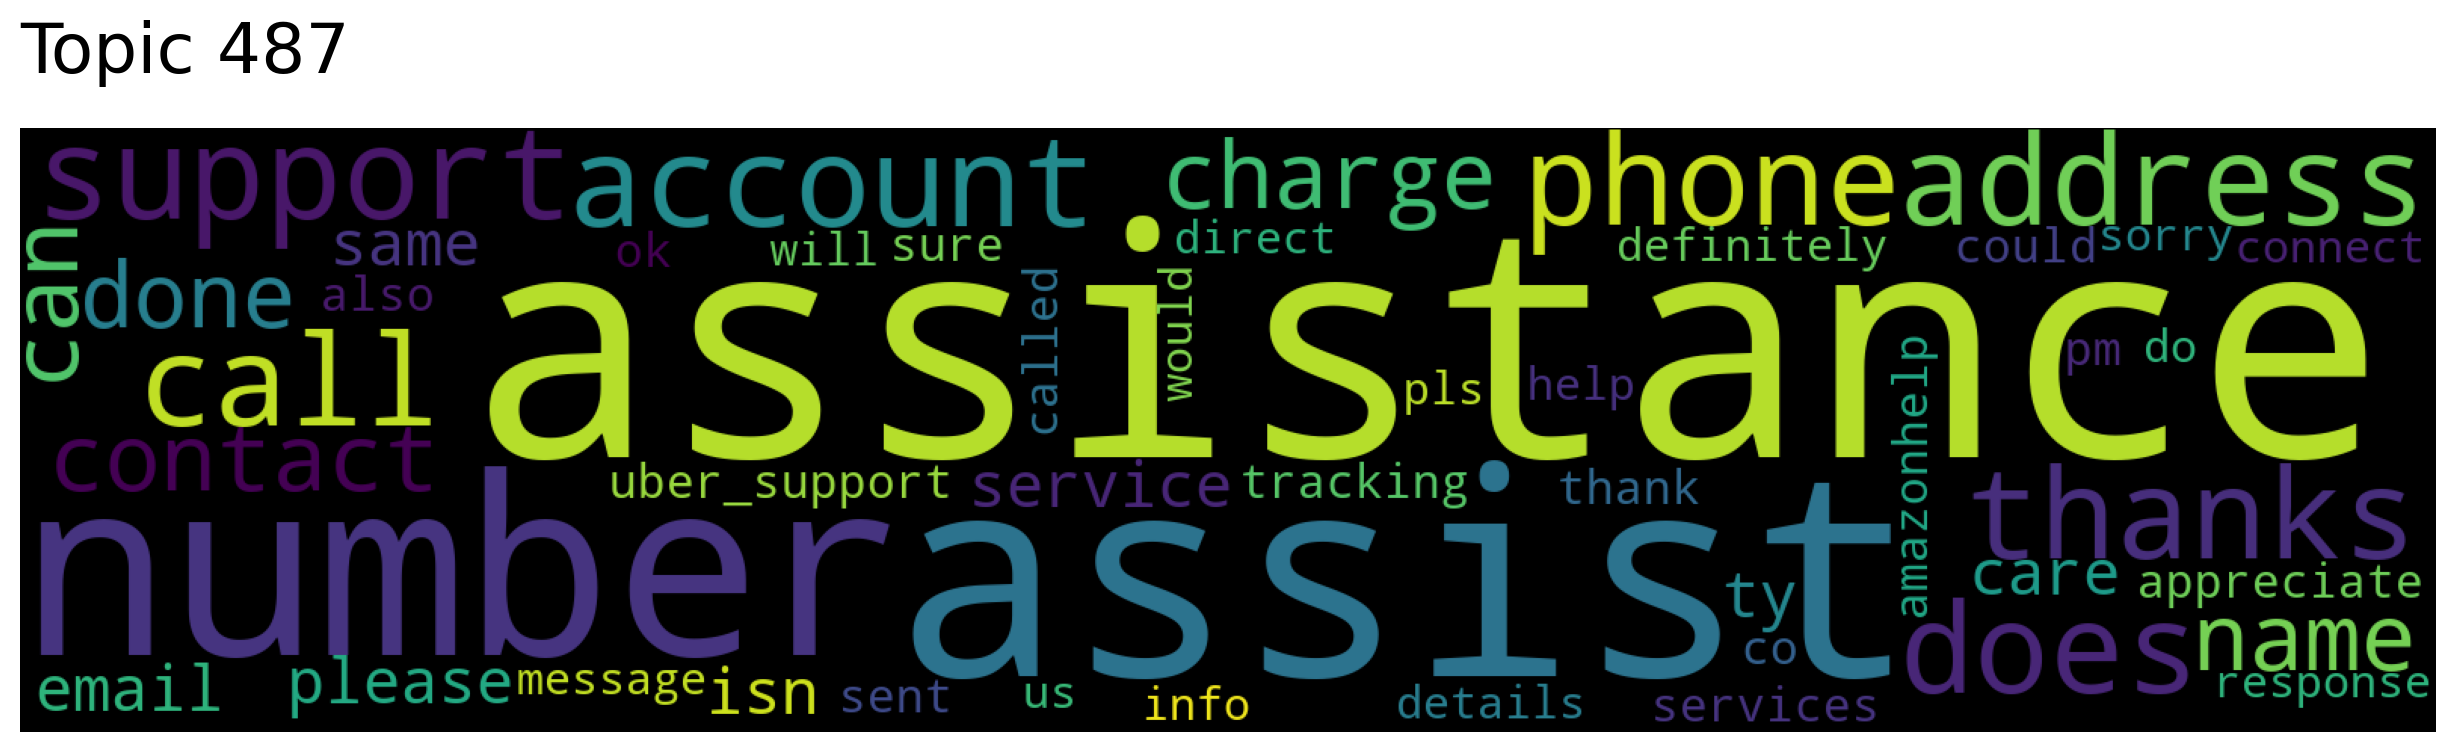

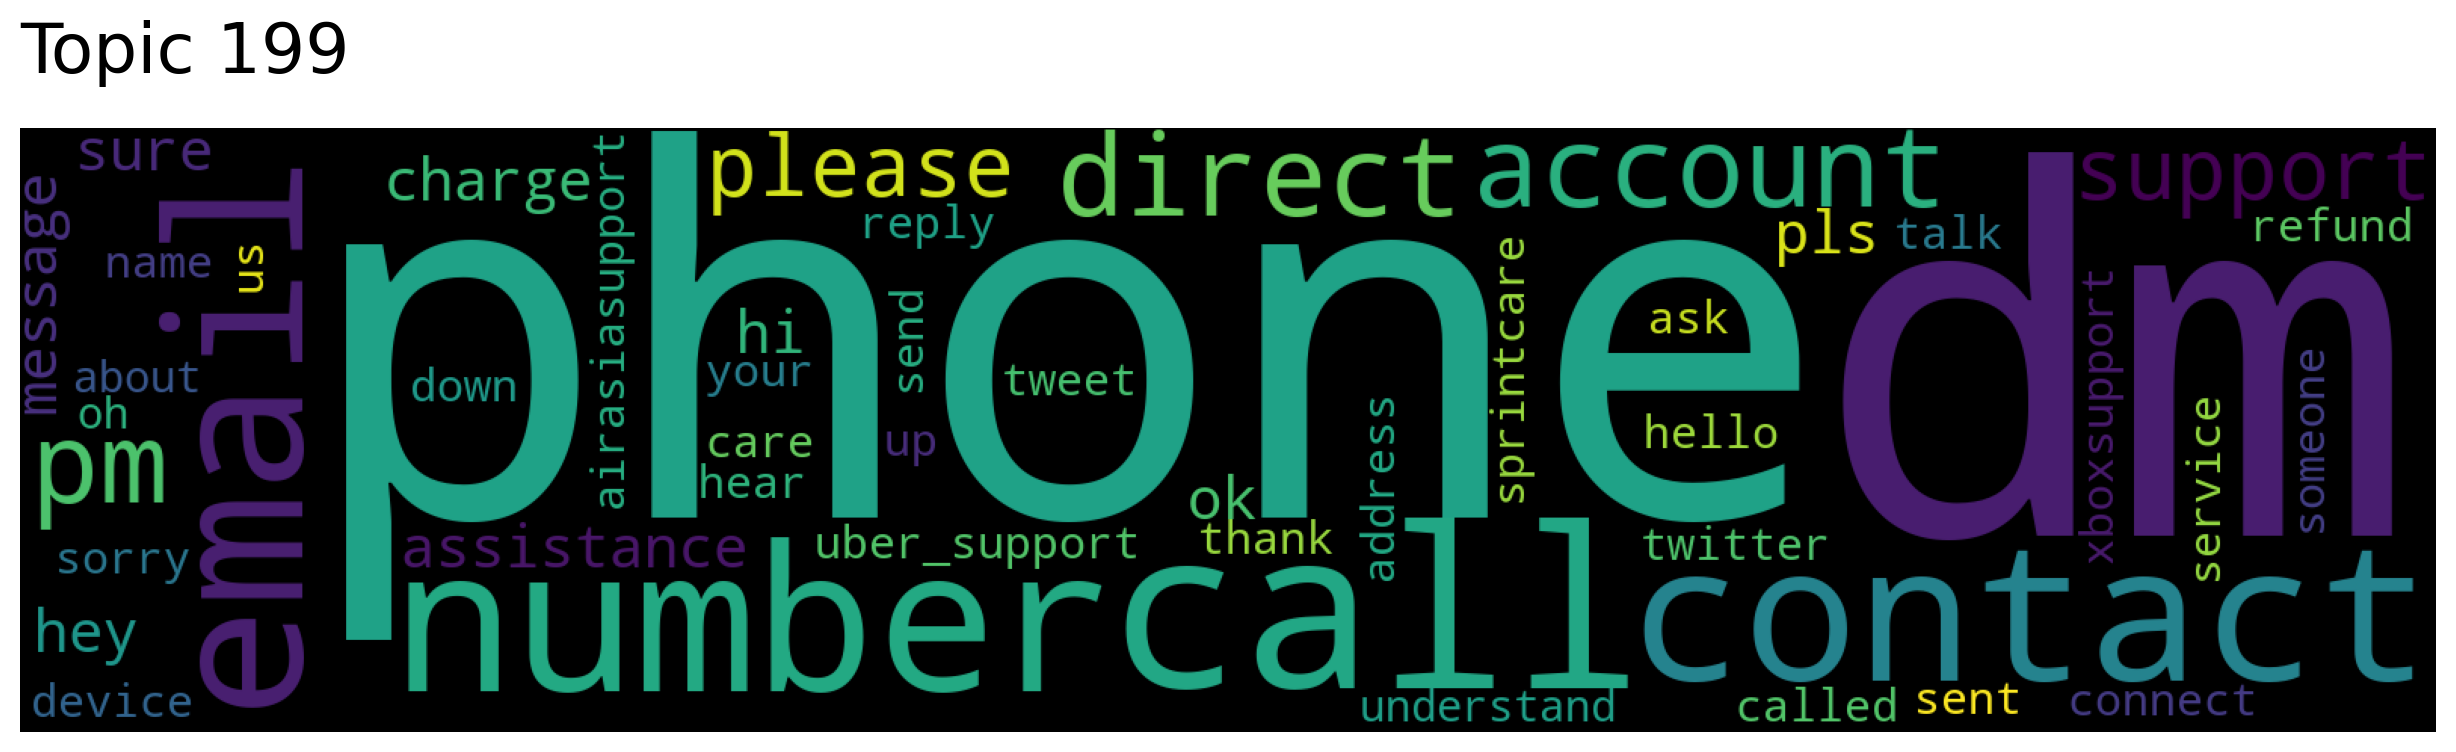

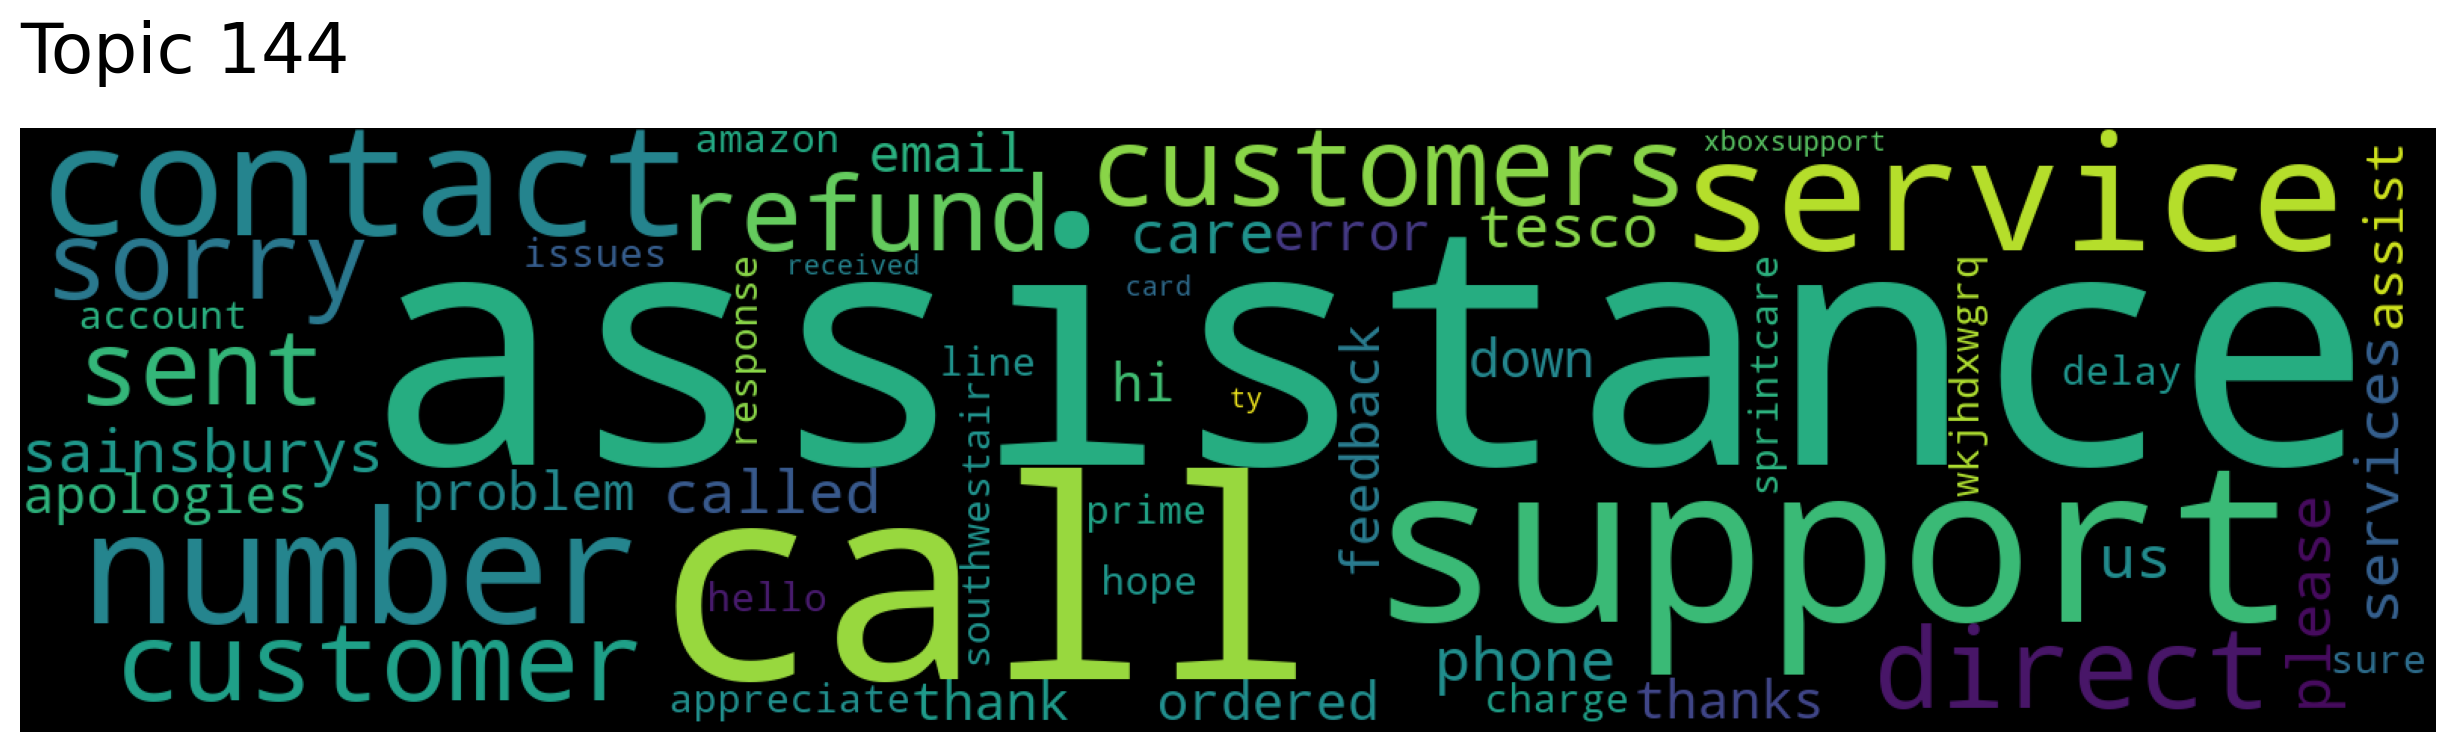

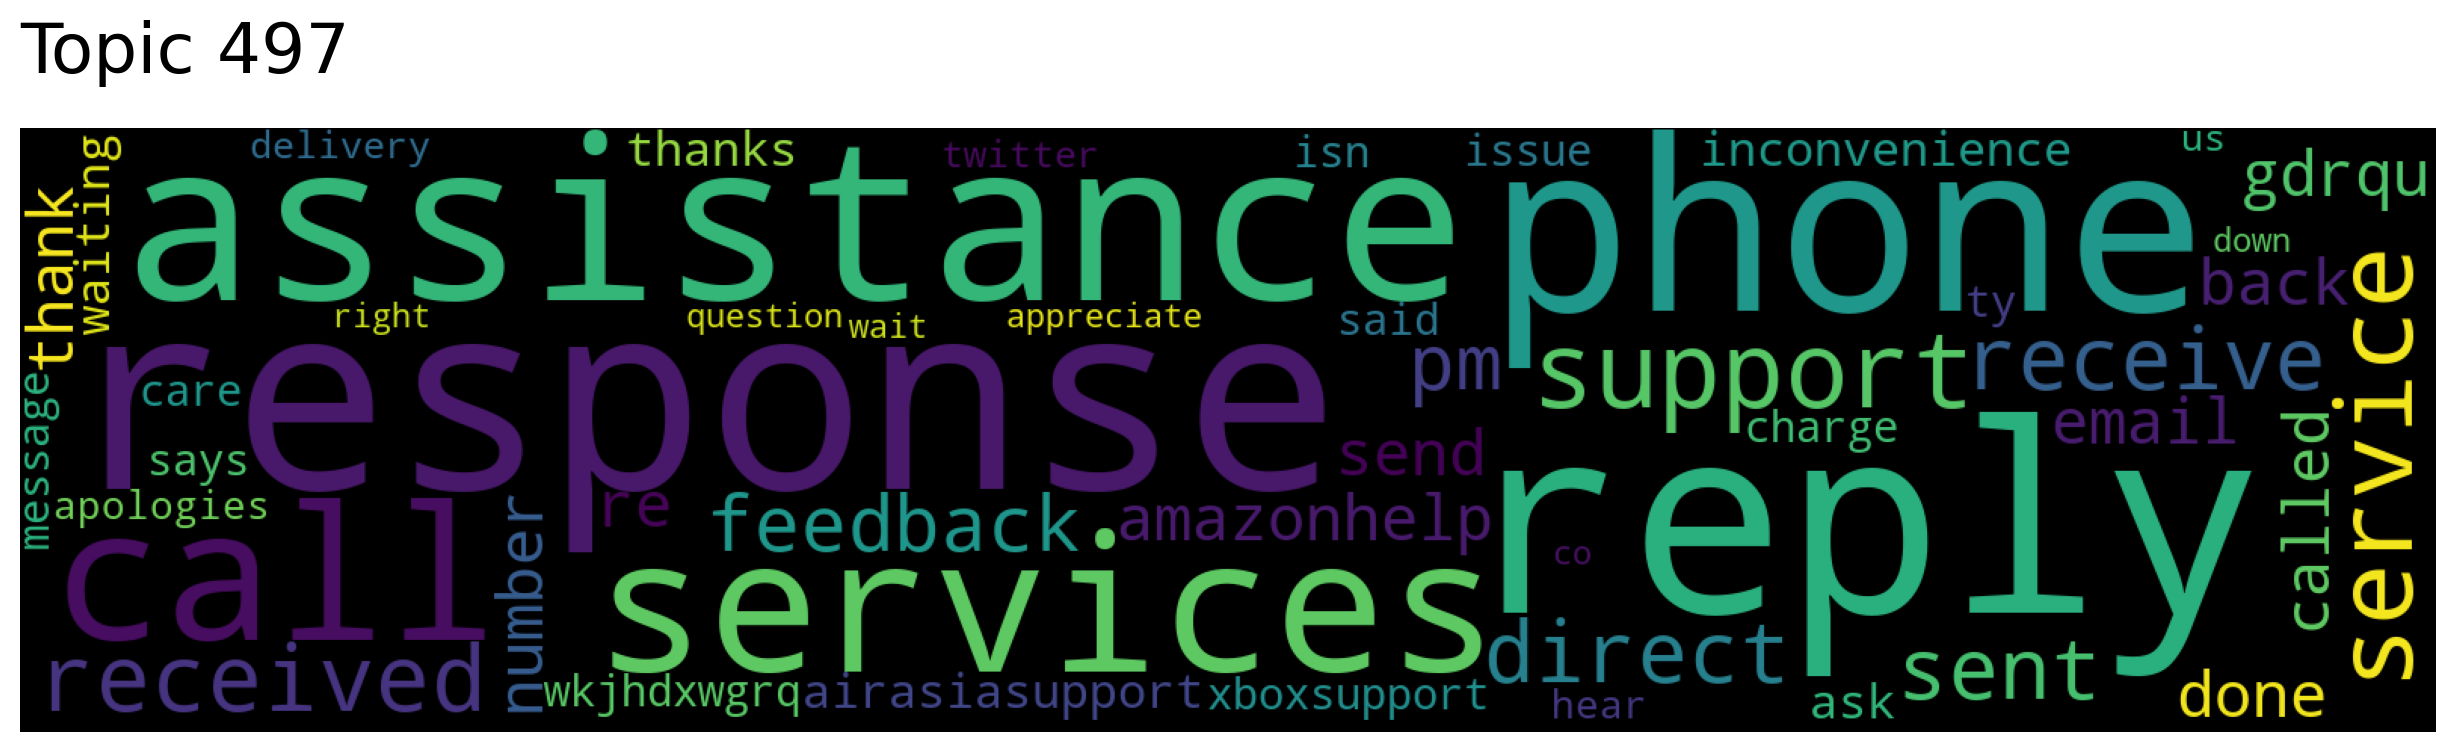

In [ ]:
keywords_select_st = widgets.Label('Enter keywords seperated by space: ')
display(keywords_select_st)

keywords_input_st = widgets.Text()
display(keywords_input_st)

keywords_neg_select_st = widgets.Label('Enter negative keywords seperated by space: ')
display(keywords_neg_select_st)

keywords_neg_input_st = widgets.Text()
display(keywords_neg_input_st)

doc_num_select_st = widgets.Label('Choose number of topics: ')
display(doc_num_select_st)

doc_num_input_st = widgets.Text(value='5')
display(doc_num_input_st)

def display_similar_topics(*args):
    
    clear_output()
    display(keywords_select_st)
    display(keywords_input_st)
    display(keywords_neg_select_st)
    display(keywords_neg_input_st)
    display(doc_num_select_st)
    display(doc_num_input_st)
    display(keyword_btn_st)
    
    try:
        topic_words, word_scores, topic_scores, topic_nums = top2vec.search_topics(keywords=keywords_input_st.value.split(),num_topics=int(doc_num_input_st.value), keywords_neg=keywords_neg_input_st.value.split())
        for topic in topic_nums:
            top2vec.generate_topic_wordcloud(topic, background_color="black")
        
    except Exception as e:
        print(e)
        
keyword_btn_st = widgets.Button(description="show topics")
display(keyword_btn_st)
keyword_btn_st.on_click(display_similar_topics)

**Search Documents with Topics**

In [ ]:
topic_num_select = widgets.Label('Select topic number: ')
display(topic_num_select)

topic_input = widgets.Text()
display(topic_input)

doc_num_select = widgets.Label('Choose number of documents: ')
display(doc_num_select)

doc_num_input = widgets.Text(value='10')
display(doc_num_input)

def display_topics(*args):
    
    clear_output()
    display(topic_num_select)
    display(topic_input)
    display(doc_num_select)
    display(doc_num_input)
    display(topic_btn)

    documents, document_scores, document_nums = top2vec.search_documents_by_topic(topic_num=int(topic_input.value), num_docs=int(doc_num_input.value))
    
    result_df = twcs.loc[document_nums]
    result_df["document_scores"] = document_scores
    
    for index,row in result_df.iterrows():
        print(f"Document: {index}, Score: {row.document_scores}")
        # print(f"Section: {row.section}")
        # print(f"Title: {row.title}")
        print("-----------")
        print(row.text)
        print("-----------")
        print()

topic_btn = widgets.Button(description="show documents")
display(topic_btn)
topic_btn.on_click(display_topics)

**Display Keywords**

In [ ]:
keywords_select_kw = widgets.Label('Enter keywords seperated by space: ')
display(keywords_select_kw)

keywords_input_kw = widgets.Text()
display(keywords_input_kw)

keywords_neg_select_kw = widgets.Label('Enter negative keywords seperated by space: ')
display(keywords_neg_select_kw)

keywords_neg_input_kw = widgets.Text()
display(keywords_neg_input_kw)

doc_num_select_kw = widgets.Label('Choose number of documents: ')
display(doc_num_select_kw)

doc_num_input_kw = widgets.Text(value='10')
display(doc_num_input_kw)

def display_keywords(*args):
    
    clear_output()
    display(keywords_select_kw)
    display(keywords_input_kw)
    display(keywords_neg_select_kw)
    display(keywords_neg_input_kw)
    display(doc_num_select_kw)
    display(doc_num_input_kw)
    display(keyword_btn_kw)
    
    try:
        documents, document_scores, document_nums = top2vec.search_documents_by_keywords(keywords=keywords_input_kw.value.split(), num_docs=int(doc_num_input_kw.value), keywords_neg=keywords_neg_input_kw.value.split())
        tw = twcs.loc[document_nums]
        tw["document_scores"] = document_scores

        for index,row in tw.iterrows():
            print(f"Document: {index}, Score: {row.document_scores}")
            # print(f"Section: {row.section}")
            # print(f"Title: {row.title}")
            print("-----------")
            print(row.text)
            print("-----------")
            print()
           
    except Exception as e:
        print(e)
        

keyword_btn_kw = widgets.Button(description="show documents")
display(keyword_btn_kw)
keyword_btn_kw.on_click(display_keywords)

**Get similar words**

In [ ]:
keywords_select_sw = widgets.Label('Enter keywords seperated by space: ')
display(keywords_select_sw)

keywords_input_sw = widgets.Text()
display(keywords_input_sw)

# keywords_neg_select_sw = widgets.Label('Enter negative keywords seperated by space: ')
# display(keywords_neg_select_sw)

# keywords_neg_input_sw = widgets.Text()
# display(keywords_neg_input_sw)


doc_num_select_sw = widgets.Label('Choose number of words: ')
display(doc_num_select_sw)

doc_num_input_sw = widgets.Text(value='20')
display(doc_num_input_sw)

def display_similar_words(*args):
    
    clear_output()
    display(keywords_select_sw)
    display(keywords_input_sw)
    display(doc_num_select_sw)
    display(doc_num_input_sw)
    display(sim_word_btn_sw)
    
    try:            
        words, word_scores = top2vec.similar_words(keywords=keywords_input_sw.value.split(), num_words=int(doc_num_input_sw.value))
        for word, score in zip(words, word_scores):
            print(f"{word} {score}")
   
    except Exception as e:
        print(e)
        
sim_word_btn_sw = widgets.Button(description="show similar words")
display(sim_word_btn_sw)
sim_word_btn_sw.on_click(display_similar_words)

In [ ]:
top2vec.get_topics(num_topics=10, reduced=False)

In [ ]:
top2vec.get_num_topics(reduced=False)

503

In [ ]:
top2vec.generate_topic_wordcloud(1)

In [ ]:
top2vec = Top2Vec(documents=docs, speed="learn", workers=15, embedding_model = 'doc2vec')

NameError: ignored

# Model - LDA

## Importing required Libraries

In [8]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

import re
import spacy
import string
import gensim
import numpy as np
import pandas as pd
from nltk import FreqDist
from nltk.stem.porter import *
from nltk.corpus import stopwords
from gensim import corpora, models
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer

warnings.filterwarnings('ignore', category = DeprecationWarning)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install pyLDAvis

# libraries for visualization
import pyLDAvis
import seaborn as sns
import pyLDAvis.gensim
import matplotlib.pyplot as plt

%matplotlib inline

## Dataset used - Sample Dataset 
    2 paragaph statements on farmer issue

### Cleaning the corpus

In [ ]:
def clean(doc):
    
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [ ]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
doc_clean = [clean(doc).split() for doc in docs] 

### Plot most frequent terms

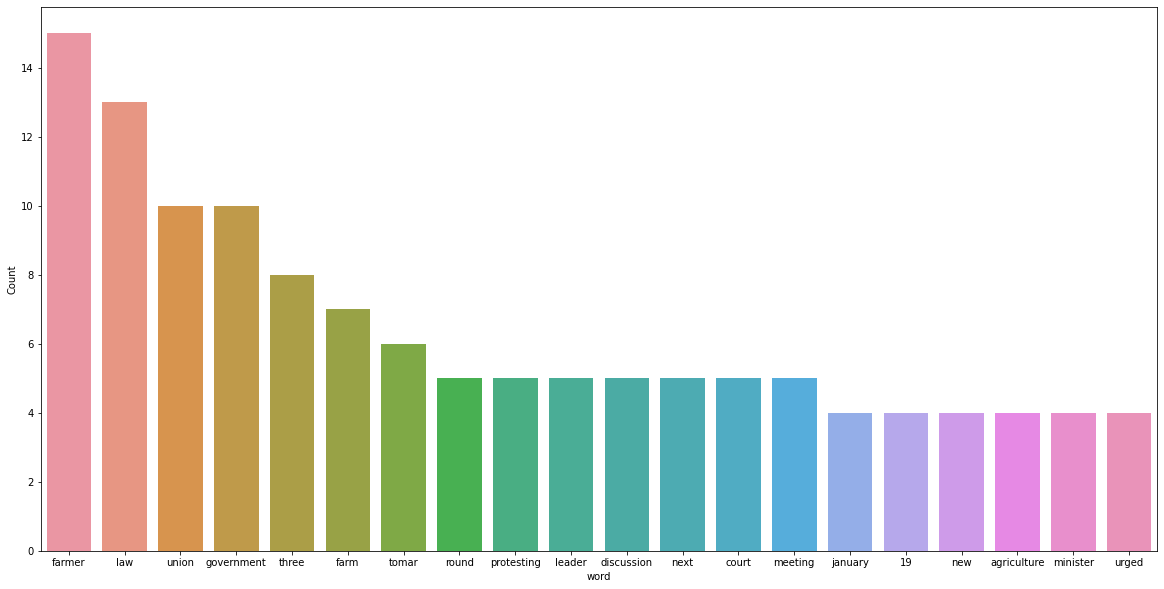

In [ ]:
def freq_words(x, terms):

    all_words = [item for sublist in doc_clean for item in sublist]
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 10 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,10))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

freq_words(docs, 20)

### Preparing Document-term Matrix

In [ ]:
dictionary = corpora.Dictionary(doc_clean)
words = [doc.split() for doc in docs]
doc_term_matrix = [dictionary.doc2bow(word) for word in words]

### Running the LDA Model

In [ ]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, passes=100)

### Results

In [ ]:
# get term-topic matrix
print(f'Term-Topic Matrix: \n{ldamodel.get_topics()}')

# representation of a single topic with its word ID 
print(f'\nTopic with its Word Id: \n{ldamodel.get_topic_terms(0)}')

# topics with its word probability pair
print(f'\nAll Topics: \n{ldamodel.show_topics(formatted=False)}')

print('\n',ldamodel.print_topics(num_topics = 3, num_words = 5))

### Visulalize the LDA Model

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)
vis

In [ ]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

## Dataset - News Popularity on Social Media

In [10]:
data_text = news[['Headline']]
data_text['index'] = data_text.index
news_docs = data_text

### Pre-processing the data

In [17]:
def remove_spchars(data):

    # Remove Emails
    data = [re.sub(r'\S*@\S*\s?', '', sent) for sent in data]

    # Remove new line characters
    data = [re.sub(r'\s+', ' ', sent) for sent in data]

    # Remove distracting single quotes
    data = [re.sub(r"\'"," ", sent) for sent in data]

    return data

def sent_to_words(sentences):

    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence).encode('utf-8'), deacc=True))  # deacc=True removes punctuations

def remove_stopwords(data_words):
    # return [[word for word not in (gensim.parsing.preprocessing.STOPWORDS and len(word) > 3 and word in data] for data in data_words]

    no_stop_words = []
    for data in data_words:
        no_stop = []
        for word in data :
          if word not in gensim.parsing.preprocessing.STOPWORDS and len(word) > 3:
              no_stop.append(word)
        no_stop_words.append(no_stop)
    return no_stop_words

def lemmatize_stemming(text):

    stemmer = SnowballStemmer('english')

    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(stemmer.stem(WordNetLemmatizer().lemmatize(token, pos='v')))

    return result

def build_bigrams_trigrams(data_words):

    # Build the bigram and trigram models
    bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
    trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

    # Faster way to get a sentence clubbed as a trigram/bigram
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)

    return bigram,trigram,bigram_mod,trigram_mod

def make_bigrams(texts, bigram_mod):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts, bigram_mod, trigram_mod):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags):

    stemmer = SnowballStemmer('english')
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [29]:
def preprocess(list_df_col):  

  data = remove_spchars(list_df_col)
  data_words = list(sent_to_words(data))
  bigram, trigram, bigram_mod, trigram_mod = build_bigrams_trigrams(list(data_words))
  no_stop_words = remove_stopwords(data_words)
  data_words_bigrams = make_bigrams(no_stop_words, bigram_mod)
  data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV','PROPN','GPE_ORG','EVT','PER','WORK_OF_ART','EVENT'])

  return data_lemmatized

data_lemmatized = preprocess((news_docs['Headline']))

#### Exemplar working of preprocessing functions

In [27]:
doc_sample = news_docs[news_docs['index'] == 4310].values[0][0]
print(f'Sample doc : {doc_sample}')

Sample doc : Alan Oster, chief economist at the NAB, discusses the global economy and where he thinks its heading. He speaks to Bloomberg's Angie Lau


##### basic stemming and lemmatization function

In [28]:
words = [word for word in doc_sample.split(' ')]
print(f'Tokenized and lemmatized document: \n{lemmatize_stemming(doc_sample)}')

Tokenized and lemmatized document: 
['alan', 'oster', 'chief', 'economist', 'discuss', 'global', 'economi', 'think', 'head', 'speak', 'bloomberg', 'angi']


##### Extended preprocessing with n-grams

In [25]:
sample_data_lemmatized = preprocess((news_docs[4310:4311]['Headline']))
print('After preprocessing: ',sample_data_lemmatized)

After preprocessing:  [['alan', 'oster', 'chief', 'economist', 'discuss', 'global', 'economy', 'think', 'head', 'speak', 'bloomberg', 'angie']]


### Bag Of Words on the Data set
  Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.
  
    - less than 15 documents (absolute number) or
    - more than 0.5 documents (fraction of total corpus size, not absolute number).
    - after the above two steps, keep only the first 100000 most frequent tokens.

In [30]:
dictionary = gensim.corpora.Dictionary(data_lemmatized)
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

Dictionary - how many words and how many times those words appear

In [31]:
bow_corpus = [dictionary.doc2bow(doc) for doc in data_lemmatized]

#### Exemplar preview of BOW for sample preprocessed doc

In [32]:
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                                     dictionary[bow_doc_4310[i][0]], 
                                                     bow_doc_4310[i][1]))

Word 9 ("discuss") appears 1 time.
Word 10 ("economy") appears 1 time.
Word 11 ("head") appears 1 time.
Word 20 ("global") appears 1 time.
Word 81 ("speak") appears 1 time.
Word 467 ("think") appears 1 time.
Word 2331 ("chief_economist") appears 1 time.
Word 2442 ("bloomberg") appears 1 time.
Word 3296 ("alan") appears 1 time.


### TF-IDF Model

In [33]:
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

#### Preview the TF-IDF score for the sample doc

In [34]:
from pprint import pprint
for doc in corpus_tfidf[4310]:
    pprint(doc)
    # break

(9, 0.30459912454114185)
(10, 0.09086507165074881)
(11, 0.3029797706443212)
(20, 0.22194879553164168)
(81, 0.27128599188400626)
(467, 0.29447085344307844)
(2331, 0.44130906627279837)
(2442, 0.36896035122297466)
(3296, 0.5164400228060451)


### Run LDA using BOW

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=4)

In [36]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.039*"palestine" + 0.023*"quot" + 0.016*"palestinian" + 0.013*"obama" + 0.012*"israel" + 0.012*"president" + 0.011*"xbox" + 0.011*"say" + 0.010*"state" + 0.007*"microsoft"
Topic: 1 
Words: 0.077*"quot" + 0.039*"obama" + 0.027*"president" + 0.017*"say" + 0.015*"barack" + 0.014*"economy" + 0.011*"economic" + 0.008*"year" + 0.008*"state" + 0.007*"leader"
Topic: 2 
Words: 0.054*"economy" + 0.034*"quot" + 0.020*"say" + 0.010*"year" + 0.010*"report" + 0.010*"economic" + 0.009*"market" + 0.008*"job" + 0.006*"work" + 0.006*"world"
Topic: 3 
Words: 0.087*"microsoft" + 0.011*"company" + 0.010*"windows" + 0.010*"window" + 0.007*"announce" + 0.007*"update" + 0.007*"user" + 0.007*"service" + 0.006*"say" + 0.006*"lumia"
Topic: 4 
Words: 0.078*"microsoft" + 0.014*"company" + 0.011*"surface" + 0.010*"announce" + 0.009*"window" + 0.008*"office" + 0.008*"release" + 0.007*"cloud" + 0.006*"today" + 0.005*"business"
Topic: 5 
Words: 0.046*"economy" + 0.032*"economic" + 0.014*"say" + 0.010

#### Visualize the model

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.048166  0.267434       1        1  18.964645
2     -0.189692 -0.101022       2        1  15.095634
0      0.240568 -0.078260       3        1  13.535712
4      0.052042  0.216905       4        1  10.319211
6     -0.181331 -0.015910       5        1   9.495637
7     -0.156421 -0.078359       6        1   7.946253
1      0.204428 -0.106157       7        1   7.266845
5      0.136306 -0.123275       8        1   6.640451
8     -0.069081  0.027790       9        1   5.942018
3     -0.084984 -0.009146      10        1   4.793592, topic_info=          Term          Freq         Total Category  logprob  loglift
92        quot  10267.000000  10267.000000  Default  30.0000  30.0000
60   microsoft  14278.000000  14278.000000  Default  29.0000  29.0000
12     economi  16055.000000  16055.000000  Default  28.0000  28.0000
4        obama  18192.000000  18192.000000  Default  27.0000  27.0000
5       presid  14508.000000  14508.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
159    billion    166.847306    884.114476  Topic10  -5.3636   1.3704
5       presid    289.139889  14508.620099  Topic10  -4.8138  -0.8777
12     economi    208.382552  16055.235913  Topic10  -5.1413  -1.3065
107       year    152.059178   6393.678985  Topic10  -5.4564  -0.7009
266      world    132.432524   2215.140125  Topic10  -5.5946   0.2209

[794 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
868       3  0.005487      abba
868       6  0.982203      abba
868       8  0.010974      abba
2745      3  0.988902     abuja
1809      3  0.970986  accident
...     ...       ...       ...
4126     10  0.978340   younger
1217      3  0.975843      zack
2070      1  0.969263   zimbabw
2070      9  0.016711   zimbabw
1852      8  0.976311   zionist

[2926 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 3, 1, 5, 7, 8, 2, 6, 9, 4])

### Running LDA using TF-IDF

In [ ]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=15)

In [38]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.012*"economy" + 0.008*"quot" + 0.007*"say" + 0.007*"economic" + 0.006*"year" + 0.006*"obama" + 0.005*"president" + 0.005*"growth" + 0.005*"global" + 0.005*"percent"
Topic: 1 Word: 0.009*"obama" + 0.008*"economy" + 0.008*"president" + 0.006*"barack" + 0.005*"economic" + 0.005*"say" + 0.005*"year" + 0.004*"microsoft" + 0.004*"global" + 0.004*"china"
Topic: 2 Word: 0.010*"microsoft" + 0.009*"quot" + 0.008*"obama" + 0.007*"president" + 0.005*"barack" + 0.005*"palestine" + 0.005*"economy" + 0.004*"say" + 0.004*"year" + 0.003*"release"
Topic: 3 Word: 0.010*"economy" + 0.008*"obama" + 0.007*"president" + 0.006*"year" + 0.006*"quot" + 0.006*"barack" + 0.005*"say" + 0.005*"microsoft" + 0.005*"economic" + 0.005*"growth"
Topic: 4 Word: 0.010*"microsoft" + 0.008*"obama" + 0.006*"president" + 0.006*"quot" + 0.005*"economy" + 0.005*"barack" + 0.004*"economic" + 0.004*"say" + 0.004*"year" + 0.004*"company"
Topic: 5 Word: 0.009*"obama" + 0.009*"president" + 0.008*"quot" + 0.008*"econo

#### Visualizing the mdoel

In [ ]:
pyLDAvis.enable_notebook()
vis_tfidf = pyLDAvis.gensim.prepare(lda_model_tfidf, corpus_tfidf, dictionary)
vis_tfidf

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.035441 -0.032432       1        1  12.288466
4     -0.059793 -0.020593       2        1  11.896974
0      0.024006  0.034550       3        1  10.723739
2     -0.035954  0.030066       4        1  10.005667
3      0.020329 -0.005887       5        1   9.777554
1      0.002348  0.033348       6        1   9.703711
7     -0.001038  0.021188       7        1   9.158090
6     -0.026153 -0.031555       8        1   9.125655
5      0.021202 -0.018636       9        1   8.794190
8      0.019611 -0.010049      10        1   8.525956, topic_info=           Term         Freq        Total Category  logprob  loglift
4202    antonin    53.000000    53.000000  Default  30.0000  30.0000
118      window   519.000000   519.000000  Default  29.0000  29.0000
60    microsoft  1262.000000  1262.000000  Default  28.0000  28.0000
37      quarter   357.000000   357.000000  Default  27.0000  27.0000
3084       cuba   121.000000   121.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
385      govern    35.146037   378.862028  Topic10  -6.0910   0.0844
8          busi    34.981510   381.867338  Topic10  -6.0957   0.0718
1141    address    33.142820   299.378872  Topic10  -6.1497   0.2612
9         china    34.741876   413.019699  Topic10  -6.1026  -0.0135
352     compani    33.429166   419.904844  Topic10  -6.1411  -0.0685

[816 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
4067      6  0.157860  abbott
4067      7  0.631439  abbott
4067      8  0.157860  abbott
3108      3  0.543553  abenom
3108      7  0.135888  abenom
...     ...       ...     ...
3879      3  0.291209    zuma
3879      4  0.048535    zuma
3879      5  0.485348    zuma
3879      9  0.048535    zuma
3879     10  0.048535    zuma

[3695 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 5, 1, 3, 4, 2, 8, 7, 6, 9])

### Performance Comparison / Scores

#### Compute Model Perplexity and Coherence Score

##### BOW

In [47]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(bow_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=list(data_lemmatized), dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.194447809772451

Coherence Score:  0.44147496928678304


##### TF-IDF

In [46]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_tfidf.log_perplexity(corpus_tfidf))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda_tfidf = CoherenceModel(model=lda_model_tfidf, texts=list(data_lemmatized), dictionary=dictionary, coherence='c_v')
coherence_lda_tfidf = coherence_model_lda_tfidf.get_coherence()
print('\nCoherence Score: ', coherence_lda_tfidf)


Perplexity:  -9.044448555899521

Coherence Score:  0.2984286502818993


#### Using the sample doc to measure performance

In [48]:
print('News headline : ',{news_docs.loc[4310,'Headline']}, '\nAfter Preprocessing: ',data_lemmatized[4310])

News headline :  {"Alan Oster, chief economist at the NAB, discusses the global economy and where he thinks its heading. He speaks to Bloomberg's Angie Lau"} 
After Preprocessing:  ['alan', 'oster', 'chief_economist', 'discuss', 'global', 'economy', 'think', 'head', 'speak', 'bloomberg', 'angie']


##### LDA - BOW Model

In [40]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.6270472407341003	 
Topic: 0.054*"economy" + 0.034*"quot" + 0.020*"say" + 0.010*"year" + 0.010*"report" + 0.010*"economic" + 0.009*"market" + 0.008*"job" + 0.006*"work" + 0.006*"world"

Score: 0.29293280839920044	 
Topic: 0.077*"quot" + 0.039*"obama" + 0.027*"president" + 0.017*"say" + 0.015*"barack" + 0.014*"economy" + 0.011*"economic" + 0.008*"year" + 0.008*"state" + 0.007*"leader"

Score: 0.010005151852965355	 
Topic: 0.085*"economy" + 0.027*"year" + 0.020*"growth" + 0.019*"economic" + 0.017*"china" + 0.016*"global" + 0.015*"grow" + 0.013*"say" + 0.013*"percent" + 0.010*"rate"

Score: 0.01000330038368702	 
Topic: 0.039*"palestine" + 0.023*"quot" + 0.016*"palestinian" + 0.013*"obama" + 0.012*"israel" + 0.012*"president" + 0.011*"xbox" + 0.011*"say" + 0.010*"state" + 0.007*"microsoft"

Score: 0.010002922266721725	 
Topic: 0.095*"obama" + 0.081*"president" + 0.047*"barack" + 0.017*"say" + 0.013*"washington" + 0.012*"white_house" + 0.010*"state" + 0.008*"quot" + 0.007*"cuba" + 

In [41]:
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.9099754095077515	 
Topic: 0.008*"obama" + 0.008*"economy" + 0.007*"president" + 0.006*"microsoft" + 0.005*"barack" + 0.005*"say" + 0.005*"quot" + 0.005*"palestine" + 0.004*"year" + 0.004*"economic"

Score: 0.01000391598790884	 
Topic: 0.012*"economy" + 0.008*"quot" + 0.007*"say" + 0.007*"economic" + 0.006*"year" + 0.006*"obama" + 0.005*"president" + 0.005*"growth" + 0.005*"global" + 0.005*"percent"

Score: 0.010003379546105862	 
Topic: 0.009*"obama" + 0.008*"economy" + 0.008*"president" + 0.006*"barack" + 0.005*"economic" + 0.005*"say" + 0.005*"year" + 0.004*"microsoft" + 0.004*"global" + 0.004*"china"

Score: 0.01000320352613926	 
Topic: 0.010*"microsoft" + 0.006*"obama" + 0.006*"president" + 0.006*"economy" + 0.006*"quot" + 0.005*"year" + 0.004*"economic" + 0.004*"say" + 0.004*"barack" + 0.004*"window"

Score: 0.010003014467656612	 
Topic: 0.009*"microsoft" + 0.009*"obama" + 0.008*"president" + 0.006*"quot" + 0.006*"barack" + 0.005*"economy" + 0.005*"state" + 0.005*"year" +

#### Testing the model on an unseen doc

##### doc1

In [57]:
unseen_doc1 = 'A high intensity earthquake of magnitude 6.3 struck Tajikistan at 10:31pm, sending tremors in Delhi-NCR and several other parts of north India on Friday night.'
bow_vector = dictionary.doc2bow(lemmatize_stemming(unseen_doc1))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.5777984261512756	 Topic: 0.029*"palestinian" + 0.022*"microsoft" + 0.013*"palestine" + 0.012*"israeli" + 0.011*"president"
Score: 0.3421832025051117	 Topic: 0.085*"economy" + 0.027*"year" + 0.020*"growth" + 0.019*"economic" + 0.017*"china"
Score: 0.010003464296460152	 Topic: 0.095*"obama" + 0.081*"president" + 0.047*"barack" + 0.017*"say" + 0.013*"washington"
Score: 0.010002722963690758	 Topic: 0.054*"economy" + 0.034*"quot" + 0.020*"say" + 0.010*"year" + 0.010*"report"
Score: 0.01000264473259449	 Topic: 0.046*"economy" + 0.032*"economic" + 0.014*"say" + 0.010*"growth" + 0.008*"month"
Score: 0.010002256371080875	 Topic: 0.039*"palestine" + 0.023*"quot" + 0.016*"palestinian" + 0.013*"obama" + 0.012*"israel"
Score: 0.01000207383185625	 Topic: 0.065*"obama" + 0.039*"president" + 0.026*"barack" + 0.015*"year" + 0.014*"quot"
Score: 0.010001951828598976	 Topic: 0.087*"microsoft" + 0.011*"company" + 0.010*"windows" + 0.010*"window" + 0.007*"announce"
Score: 0.010001876391470432	 Topi

##### doc2

In [56]:
unseen_doc2 = "Must Not Harm Our Interests: China Pulls BBC World News off Air Over Controversial Report"

bow_vector = dictionary.doc2bow(lemmatize_stemming(unseen_doc2))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.7267438769340515	 Topic: 0.085*"economy" + 0.027*"year" + 0.020*"growth" + 0.019*"economic" + 0.017*"china"
Score: 0.17323753237724304	 Topic: 0.046*"economy" + 0.032*"economic" + 0.014*"say" + 0.010*"growth" + 0.008*"month"
Score: 0.012505154125392437	 Topic: 0.029*"palestinian" + 0.022*"microsoft" + 0.013*"palestine" + 0.012*"israeli" + 0.011*"president"
Score: 0.012503724545240402	 Topic: 0.054*"economy" + 0.034*"quot" + 0.020*"say" + 0.010*"year" + 0.010*"report"
Score: 0.012502851895987988	 Topic: 0.087*"microsoft" + 0.011*"company" + 0.010*"windows" + 0.010*"window" + 0.007*"announce"
Score: 0.012501916848123074	 Topic: 0.095*"obama" + 0.081*"president" + 0.047*"barack" + 0.017*"say" + 0.013*"washington"
Score: 0.012501551769673824	 Topic: 0.039*"palestine" + 0.023*"quot" + 0.016*"palestinian" + 0.013*"obama" + 0.012*"israel"
Score: 0.012501487508416176	 Topic: 0.077*"quot" + 0.039*"obama" + 0.027*"president" + 0.017*"say" + 0.015*"barack"
Score: 0.012501155026257038	 To

## Model - Cherence


In [60]:
from gensim.models import CoherenceModel, LdaModel, HdpModel

goodLdaModel = LdaModel(corpus=bow_corpus, id2word=dictionary, iterations=50, num_topics=10)


In [61]:
goodcm = CoherenceModel(model=goodLdaModel, corpus=bow_corpus, dictionary=dictionary, coherence='u_mass')

In [69]:
# try:
    # raise ImportError
import pyLDAvis.gensim
#     CAN_VISUALIZE = True
#     pyLDAvis.enable_notebook()
#     from IPython.display import display
# except ImportError:
#     ValueError("SKIP: please install pyLDAvis")
#     CAN_VISUALIZE = False
    
# if CAN_VISUALIZE:
prepared = pyLDAvis.gensim.prepare(goodLdaModel, bow_corpus, dictionary)
display(pyLDAvis.display(prepared))

In [67]:
print(goodcm.get_coherence())

-6.675071033908485


In [68]:
goodcmc_v = CoherenceModel(model=goodLdaModel, texts=data_lemmatized, dictionary=dictionary, coherence='c_v')
print(goodcmc_v.get_coherence())


0.47917070020457897
